In [1]:
import pandas as pd
data = pd.read_csv("ex1data1.csv")

C:\Users\Shree\AppData\Local\Temp\ipykernel_1596\2895976479.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data.head

<bound method NDFrame.head of           x         y
0    6.1101  17.59200
1    5.5277   9.13020
2    8.5186  13.66200
3    7.0032  11.85400
4    5.8598   6.82330
..      ...       ...
92   5.8707   7.20290
93   5.3054   1.98690
94   8.2934   0.14454
95  13.3940   9.05510
96   5.4369   0.61705

[97 rows x 2 columns]>

In [3]:
x= data["x"]
y=data["y"]

In [4]:
import matplotlib.pyplot as plt
def plotdata(x,y):
    plt.scatter(x,y)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title('Simple Plot')

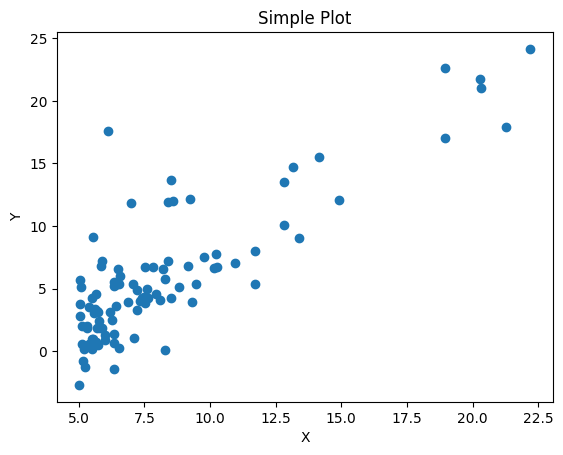

In [5]:
plotdata(x,y)

In [6]:
import numpy as np
x=x.to_numpy().reshape(97,1)
y=y.to_numpy().reshape(97,1)
#print(x)
#print("----------------------------")
#print(y)

In [7]:
print(x.shape)
print(y.shape)

(97, 1)
(97, 1)


In [8]:
x0 = np.ones(x.shape).reshape(97,1)
x0.shape

(97, 1)

In [9]:
X = np.concatenate((x0,x),axis=1)
#print(X)

In [10]:
O = np.zeros((X.shape[1],1))
print(O.shape)
O

(2, 1)


array([[0.],
       [0.]])

## Hypothesis

In [11]:
#mx1+cx0
def hypothesis(X,O):
    return np.matmul(X,O)

In [12]:
h = hypothesis(X,O)
#print(h)


## Cost Function

In [13]:
# 1/2m*sum((h-y)^2) 
def cost_function(O,X,y,m):
    h = hypothesis(X,O)
    return (1/2 * m) * sum((h-y)**2)
    

In [14]:
no_of_fetures = x.shape[0]
cost_function(O,X,y,no_of_fetures)

array([301772.35305298])

## Gradient Decent

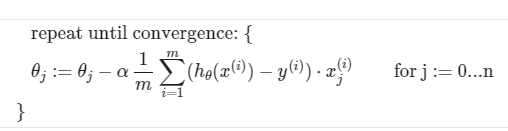

In [15]:
from PIL import Image
from IPython.display import display
img = Image.open('Capture.PNG')
display(img)

In [16]:
def gradient_decent(o,alpha,x,y,m):
    cost_history=[]
    while True:
        hyp= hypothesis(x,o)
        sub=hyp-y
        prev_cost = cost_function(o,x,y,m)
        o=o-(alpha/m)*(np.matmul(np.transpose(x),sub))
        new_cost=cost_function(o,x,y,m)
        cost_history.append(new_cost)
        if new_cost == prev_cost:
            return o,cost_history

In [17]:
no_of_features = X.shape[0]
alpha = 0.01
theta, cost_history = gradient_decent(O,alpha,X,y,no_of_features)

## Gradient decent gaph

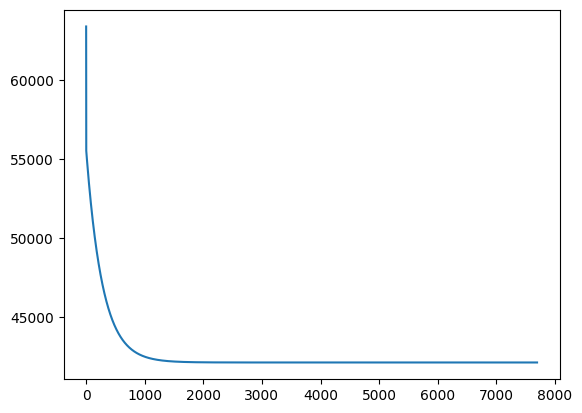

In [18]:
plt.plot(range(len(cost_history)), cost_history)

## plot line

In [19]:
import matplotlib.pyplot as plt
def plotline(x,y,theta):
    plt.scatter(x[:,1],y)
    plt.plot(x[:,1],hypothesis(x,theta),"r")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title('Simple Plot')

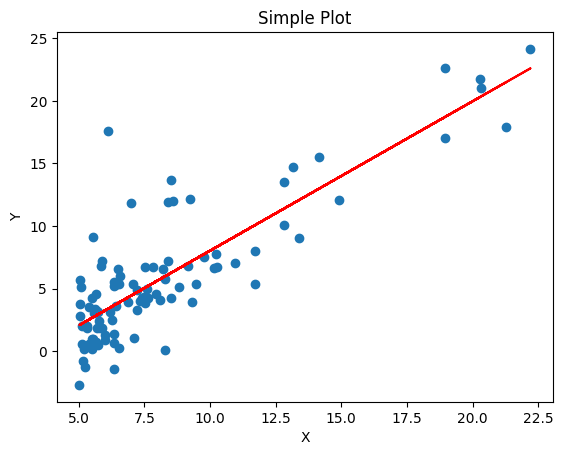

In [20]:
plotline(X,y,theta)

In [21]:
hypothesis(np.array([1,10]),theta)

array([8.03455555])

## Mean square error

In [22]:
def mean_squre_error(y,X,theta):
    hyp=hypothesis(X,theta)
    diff = sum((y-hyp)**2)/len(y)
    return diff

In [23]:
mean_squre_error(y,X,theta)

array([8.95394275])

In [24]:
theta

array([[-3.89577718],
       [ 1.19303327]])